<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_preditivos_classicos/blob/main/4.trabalho_RegressaoLinear__KNN_RegressaoPolinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos preditivos clássicos**

Sala: 01

Alunos:

* Arthur Wanderley Ferreira dos Santos
* André Felipe Bezerra de Souza Leão
* Manuela de Lacerda Bezerra Carvalho
* Valéria Cristina Andrade Rodrigues de Figueredo
* Thiago Wanderley Amorim

# Regressão Linear

Base de dados utilizada:
1. Carregamento de dados
2. Análise dos dados
2. Remoção de campo desnecessário (b)
4. Tratamento de dados nulos e/ou faltantes
5. Separação dos dados, holdout
6. Normalização dos dados
7. Treinamento de modelos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## Obtenha os dados
** Leia o arquivo csv 'BostonHousing.csv' em um DataFrame **

**Descrição dos dados**

O quadro de dados Boston tem 506 linhas e 14 colunas.

Este quadro de dados contém as seguintes colunas:

* crim: índice de criminalidade per capita por município.

* zn: proporção de terreno residencial zoneada para lotes acima de 25.000 pés quadrados.

* indus: proporção de hectares de negócios não varejistas por cidade.

* chas: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário).

* nox: concentração de óxidos de nitrogênio (partes por 10 milhões).

* rm: número médio de cômodos por domicílio.

* idade / age: proporção de unidades ocupadas pelo proprietário construídas antes de 1940.

* dis: média ponderada das distâncias para cinco centros de emprego de Boston.

* rad: índice de acessibilidade às rodovias radiais.

* imposto / tax: valor total do imposto predial por \$10.000.

* ptratio: relação aluno-professor por município.

* **preto / b**: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade.

* lstat: status inferior da população (porcentagem).

* medv: valor médio de residências ocupadas pelos proprietários em \$1000s. (**coluna target do nosso modelo**)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

Verifique o cabeçalho do DataFrame

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Vamos remover a coluna b porque não vamos utilizar essa informação na nossa modelagem.

In [ ]:
df.drop(columns=['b'], inplace=True)

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Estatística Descritiva

Dados faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


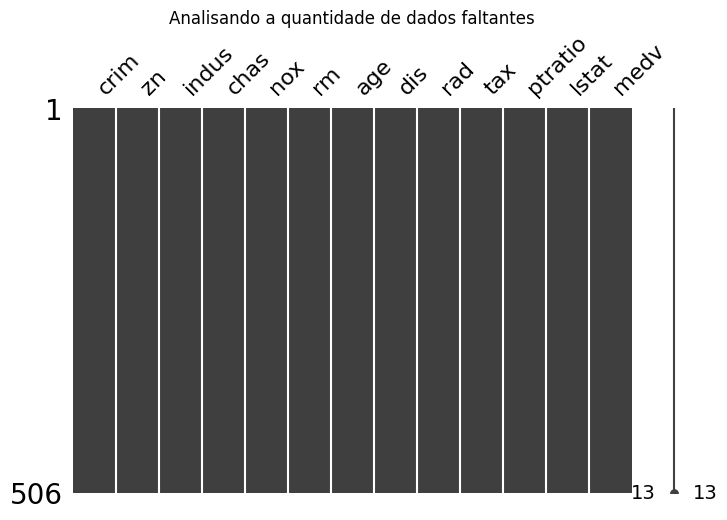

In [ ]:
msno.matrix(df, figsize=(8,5))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

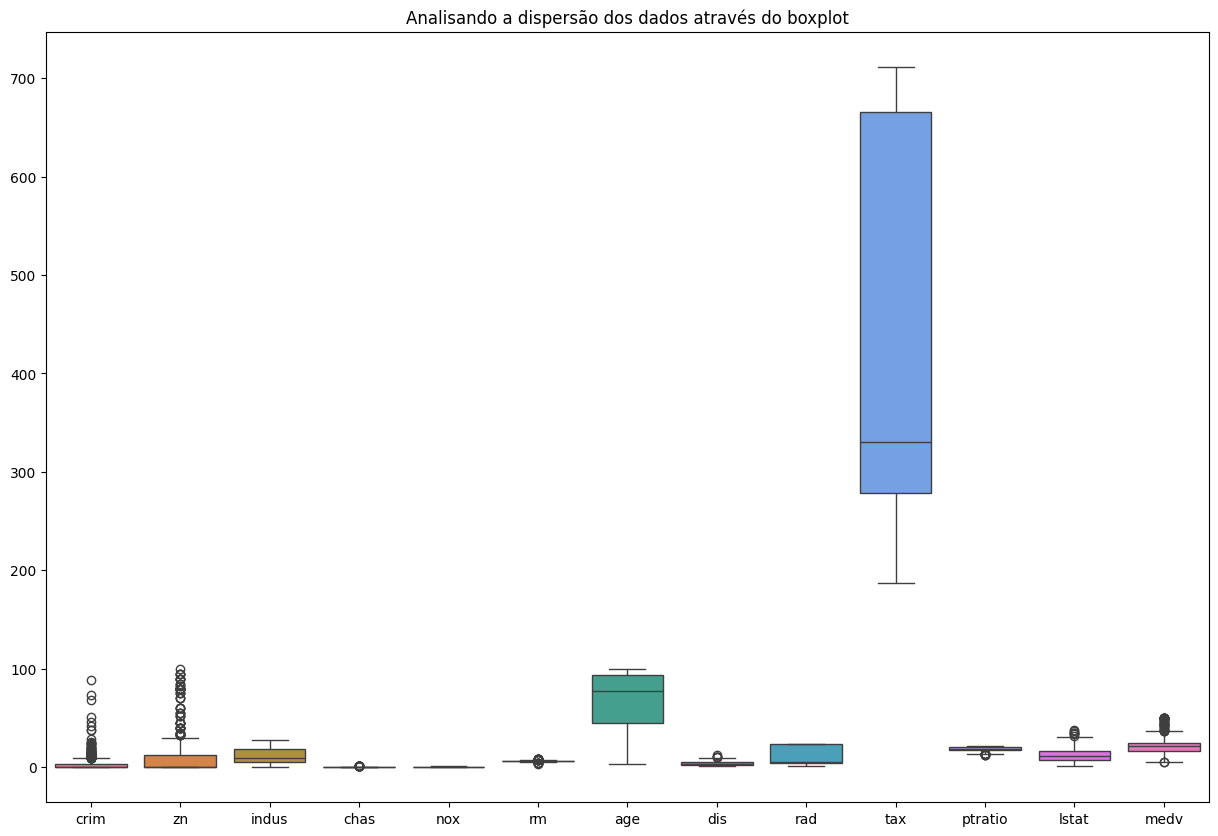

In [ ]:
plt.subplots(figsize=(15,10))
sns.boxplot(df)
plt.title("Analisando a dispersão dos dados através do boxplot")
plt.show()

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

A coluna target do nosso modelo é **medv**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['medv']),
                                                    df['medv'],
                                                    test_size=0.3,
                                                    random_state=111)

In [ ]:
pd.DataFrame(X_train).head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,4.56
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,7.67
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666,20.2,28.28
77,0.08707,0.0,12.83,0,0.437,6.140,45.8,4.0905,5,398,18.7,10.27
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,10.11


## Normalização dos dados

Vamos normalizar os dados.

Import StandardScaler do Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

Converta as variáveis independentes com o StandardScaler

In [ ]:
scaler.fit(X_train)

StandardScaler()

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Visualizando os dados de treinamento.

In [ ]:
X_train_scaled[:3]

array([[-0.44907456,  3.78381385, -1.43347391, -0.28154625, -1.33889353,
         1.02600682, -1.97141772,  1.85891086, -0.76927921, -0.07524679,
        -0.75662273, -1.19006285],
       [-0.43799762, -0.46194571, -0.40276632, -0.28154625, -0.31222266,
         0.73462462,  0.06573687, -0.42852307, -0.54062695, -0.18141874,
         1.10972235, -0.74008473],
       [ 2.80931263, -0.46194571,  0.98410962, -0.28154625,  1.26727098,
        -2.46306977,  1.10977861, -1.09077412,  1.63156951,  1.48194185,
         0.77473734,  2.24192461]])

Visualizando os dados de teste.

In [ ]:
X_test_scaled[:3]

array([[-0.44944236,  0.78943605,  0.53926262, -0.28154625, -0.80362068,
        -0.12149835, -1.47668018, -0.0423967 , -0.65495308, -0.85384111,
        -0.18236271, -0.95132848],
       [-0.37107324, -0.46194571, -0.74585094, -0.28154625, -0.4262972 ,
         0.48980349,  0.4113256 , -0.23016722, -0.19764856, -0.63559876,
        -0.56520272, -0.75021285],
       [-0.44959216,  2.88996973, -1.21831916, -0.28154625, -1.11951941,
         0.45525818, -1.73496228,  0.78497606, -0.76927921, -0.96001306,
        -0.1345077 , -1.22478785]])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 199 to 340
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     354 non-null    float64
 1   zn       354 non-null    float64
 2   indus    354 non-null    float64
 3   chas     354 non-null    int64  
 4   nox      354 non-null    float64
 5   rm       354 non-null    float64
 6   age      354 non-null    float64
 7   dis      354 non-null    float64
 8   rad      354 non-null    int64  
 9   tax      354 non-null    int64  
 10  ptratio  354 non-null    float64
 11  lstat    354 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 36.0 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 93 to 158
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     152 non-null    float64
 1   zn       152 non-null    float64
 2   indus    152 non-null    float64
 3   chas     152 non-null    int64  
 4   nox      152 non-null    float64
 5   rm       152 non-null    float64
 6   age      152 non-null    float64
 7   dis      152 non-null    float64
 8   rad      152 non-null    int64  
 9   tax      152 non-null    int64  
 10  ptratio  152 non-null    float64
 11  lstat    152 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 15.4 KB


## Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train_scaled, y_train)
reg

LinearRegression()

**Executar o modelo treinado na base de treinamento**

In [ ]:
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

Analisando o score de treino e teste.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#treino
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Train MSE: {train_mse}')
print(f'Train MAE: {train_mae}')
print(f'Train R²: {train_r2}')

Train MSE: 20.374619886830068
Train MAE: 3.1835585717761252
Train R²: 0.7381975510401046


In [ ]:
#teste
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R²: {test_r2}')

test MSE: 28.607656840343854
Test MAE: 3.701488287606292
Test R²: 0.711547915567693


**Avaliação de Regressores - Exibir os Resultados**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", mean_squared_error(y_test_in, y_test_pred_in)**2)
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [ ]:
# dados de treino
print_metrics(y_train, y_train_pred)

MEAN:  3.1835585717761252
MAPE:  0.16078737073033178
MSE:  20.374619886830068
RMSE:  415.12513553281127
R²:  0.7381975510401046


In [ ]:
# dados de teste
print_metrics(y_test, y_test_pred)

MEAN:  3.701488287606292
MAPE:  0.17831885665559696
MSE:  28.607656840343854
RMSE:  818.3980298948725
R²:  0.711547915567693


## k-NN Regressão

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

**Executar o modelo treinado na base de treinamento**

In [ ]:
# score dos dados de treino
score = knn_regressor.score(X_train_scaled, y_train)
print(f'R²: {score}')

R²: 0.8094024900943854


In [ ]:
# score dos dados de teste.
knn_regressor.score(X_test_scaled, y_test)

0.7395553732097606

**Avaliar o melhor valor de K**

k=1, Score=0.7842753969841532
k=2, Score=0.7823765354304283
k=3, Score=0.7597083113180875
k=4, Score=0.731755208160243
k=5, Score=0.7395553732097606
k=6, Score=0.7388221977958188
k=7, Score=0.7411576307273304
k=8, Score=0.731978697531539
k=9, Score=0.7343113651092412
k=10, Score=0.7276080613590207
k=11, Score=0.7197214778448741
k=12, Score=0.7206326335192764
k=13, Score=0.712988331725854
k=14, Score=0.7093107796674782
k=15, Score=0.6979940762395557
k=16, Score=0.6938105774913246
k=17, Score=0.6921703221235
k=18, Score=0.6843492107005482
k=19, Score=0.6797808258650299
k=20, Score=0.6697831117365683
k=21, Score=0.6667603986355106
k=22, Score=0.6632559701851524
k=23, Score=0.6561193624432566
k=24, Score=0.64926457386365
k=25, Score=0.6453648234120946
k=26, Score=0.6381885379419517
k=27, Score=0.6354207237206924
k=28, Score=0.6301944439655087
k=29, Score=0.6276252182292488


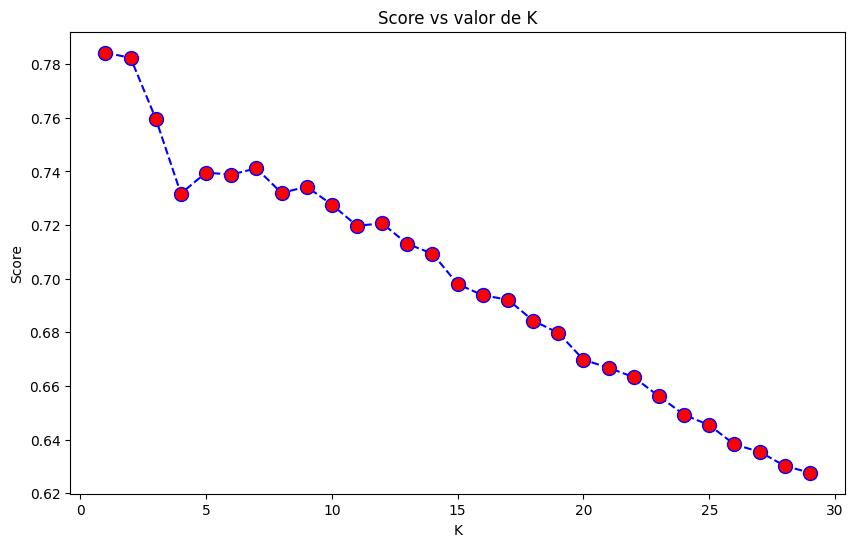

In [ ]:
import numpy as np

score = []

for i in range(1,30):
  # Criar e treinar o modelo KNN
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    # Avaliar o modelo e armazenar a acurácia
    score.append(knn.score(X_test_scaled, y_test))
    print(f"k={i}, Score={score[-1]}")

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score vs valor de K')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

### Criar um regressor com o melhor valor para o melhor K e avaliar





In [ ]:
## com o melhor valor de k
knn_2 = KNeighborsRegressor(n_neighbors=2)
knn_2.fit(X_train_scaled, y_train)

0.9168829094974466
0.7823765354304283


**Avaliação de Regressores - k-NN**

In [ ]:
print("Dados de treino")
print(knn_2.score(X_train_scaled, y_train))

Dados de treino
0.9168829094974466


In [ ]:
print("Dados de teste")
print(knn_2.score(X_test_scaled, y_test))

Dados de teste
0.7823765354304283


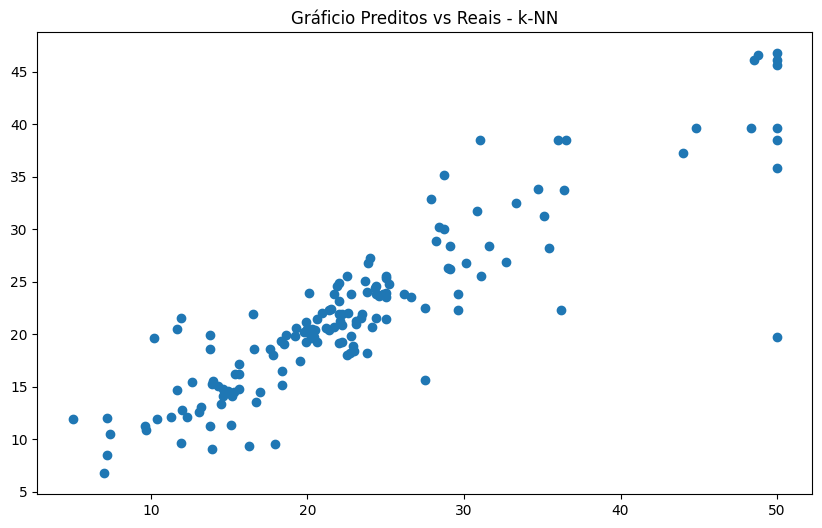

In [ ]:
y_test_knn_pred = knn_2.predict(X_test_scaled)

plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - k-NN')
plt.scatter(y_test, y_test_knn_pred)
plt.show()

## Treinar o modelo de Regressão Polinomial, n=1, n=5, n=10

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Com os dados normalizados, aplicar a transformação polinomial de graus 1, 5, 10 e 15

Grau 1

In [ ]:
poly_grau_1 = PolynomialFeatures(degree=1)
X_train_scaled_poly_1 = poly_grau_1.fit_transform(X_train_scaled)
X_test_scaled_poly_1 = poly_grau_1.transform(X_test_scaled)

Grau 5

In [ ]:
poly_grau_5 = PolynomialFeatures(degree=5)
X_train_scaled_poly_5 = poly_grau_5.fit_transform(X_train_scaled)
X_test_scaled_poly_5 = poly_grau_5.transform(X_test_scaled)

Grau 10

In [ ]:
poly_grau_10 = PolynomialFeatures(degree=10)
X_train_scaled_poly_10 = poly_grau_10.fit_transform(X_train_scaled)
X_test_scaled_poly_10 = poly_grau_10.transform(X_test_scaled)

**Treinar o modelo de regressão linear para verificar o melhor resultado da transformação polinomial**

Grau 1

In [ ]:
## treine o modelo
knn_pol_1 = KNeighborsRegressor(n_neighbors=2)
knn_pol_1.fit(X_train_scaled_poly_1, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
## analise as métricas
knn_pol_1.score(X_test_scaled_poly_1, y_test)

0.7823765354304283

In [ ]:
y_pred_poly_1 = knn_pol_1.predict(X_test_scaled_poly_1)

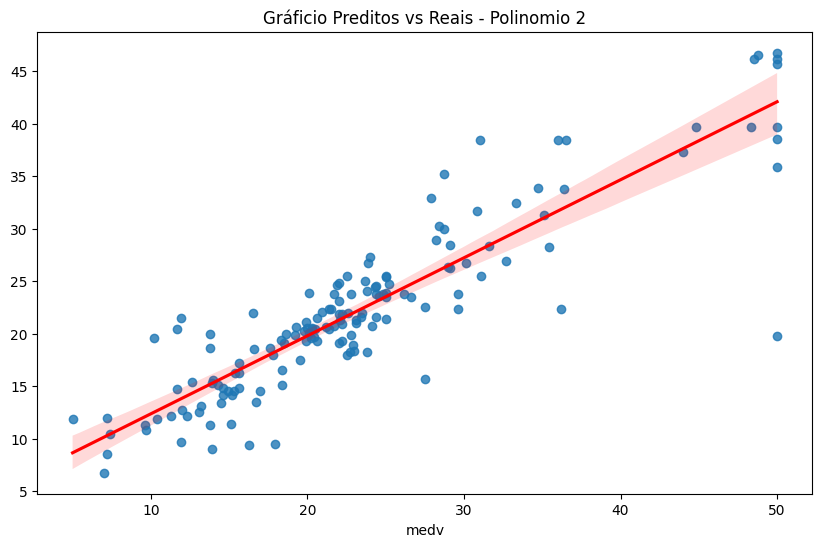

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráficio Preditos vs Reais - Polinomio 2')
sns.regplot(x=y_test,y=y_pred_poly_1,line_kws={"color": "red"})
plt.show()

Grau 5

In [ ]:
## treine o modelo
knn_pol_5 = KNeighborsRegressor(n_neighbors=2)
knn_pol_5.fit(X_train_scaled_poly_5, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
## análise as métricas
knn_pol_5.score(X_test_scaled_poly_5, y_test)

0.7685420437559063

In [ ]:
y_pred_poly_5 = knn_pol_5.predict(X_test_scaled_poly_5)

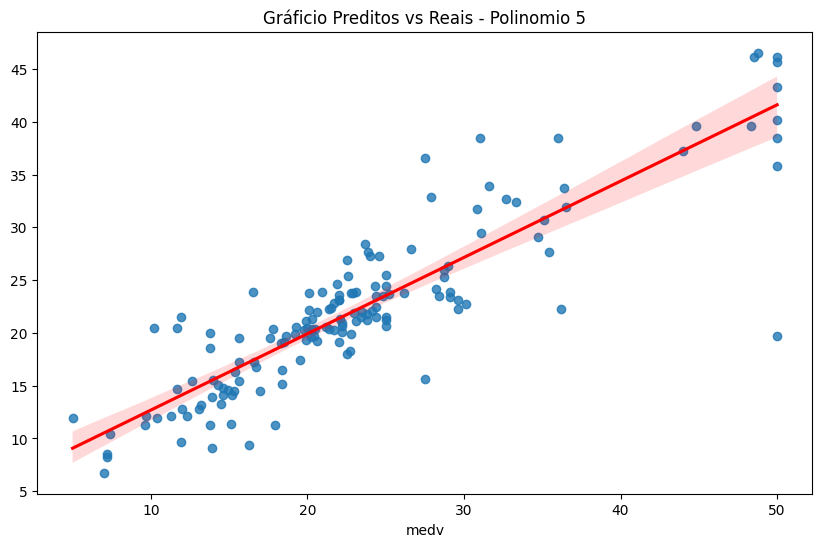

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráficio Preditos vs Reais - Polinomio 5')
sns.regplot(x=y_test,y=y_pred_poly_5,line_kws={"color": "red"})
plt.show()

Grau 10

In [ ]:
## treine o modelo - vai demorar um pouco..
knn_pol_10 = KNeighborsRegressor(n_neighbors=2)
knn_pol_10.fit(X_train_scaled_poly_10, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
## analise as métricas
knn_pol_10.score(X_test_scaled_poly_10, y_test)

0.6897600192059525

In [ ]:
y_pred_poly_10 = knn_pol_10.predict(X_test_scaled_poly_10)

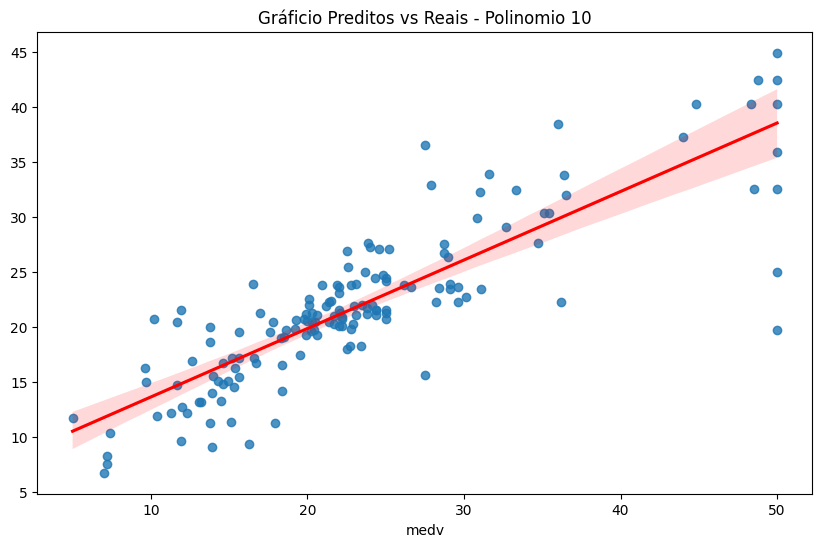

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráficio Preditos vs Reais - Polinomio 10')
sns.regplot(x=y_test,y=y_pred_poly_10,line_kws={"color": "red"})
plt.show()

## Conclusão

O presente trabalho realizou o carregamento dos dados, a importação das bibliotecas, a análise exploratória dos dados para compreensão inicial, a remoção de coluna desnecessária, a separação dos dados em treino e teste, a normalização dos dados e o treinamento de modelos via regressão linear, KNN regressão e regressão polinomial.

Na parte da exploração dos dados (EDA), foi possível verificar que as catorze colunas tinham dados em todas as 506 linhas, de modo que não se tornou imprescindível a limpeza dos mesmos. Apenas foi removida a coluna b porque não foi utilizada essa informação na modelagem.

Dentre as características do dataframe, a coluna que apresentou dados mais altos foi tax. A sua média foi 408.237.154 e o seu desvio padrão foi 168.537116. Ademais, os dados tiveram maior dispersão no terceiro quartil, como é possível verificar quando se visualiza o boxplot.

Os dados foram separados em treino (354) e teste(132), normalizados  (via StandardScaler) e transformados para o formato padronizado (via transform).

Ocorreu a aplicação da técnica da regressão linear, com o treinamento e a execução do modelo. Posteriormente foram analisados o score do treino e teste, através das métricas MSE, MAE e R². Os resultados foram significativos. Por exemplo, o R² (treino) foi 0.73819 e o R² (teste) foi 0.71154, o que demonstrou pela sua proximidade que o modelo foi bem treinado.

Também foram avaliados os regressores com as métricas MEAN, MAPE, MSE, RMSE E R². O MEAN (treino), por exemplo, resultou em 3.18 e o MEAN (teste) resultou em 3.70.

Após a aplicação da técnica da regressão linear, ocorreu a aplicação da técnica do K-NN Regressão. O resultado da métrica R² (treino) foi 0.8094024900943854 e R² (teste) foi 0.739555373209760. Os scores do treino/teste expressaram bons resultados.

Também foram avaliados os "k", cujo melhor foi k=2, com score igual a 0.7823765354304283. Nessa senda, foi criado um regressor com K = 2 e a respectiva avaliação dos scores de treino (0.9168829094974466) e teste (0.7823765354304283). Também foi plotado um gráfico predict vs. real.

Por fim, Ocorreu a aplicação da técnica de Regressão Polinomial, com grau 1, 5 e 10. Primeiro, ocorreram as transformações polinomiais, depois os treinamentos dos modelos. Quando avaliados, a melhor métrica foi do polinômio grau 1, isto é, 0.7823765354304283.

